# **Introducton**

In this project I am working with the dataset named "All Country" that I found on Kaggle.

This data set has information about various countries including details about their geographical, economic, and social aspects. Each row represents a different country, and the columns contain information such as the currency, capital city, region, population, economic indicators, energy production, CO2 emissions, and more.

LINK TO THE DATASET : https://www.kaggle.com/datasets/adityakishor1/all-countries-details


# **Environment Setup**

Source : DSCI 632 HW Assignments.



In [ ]:
# Install Spark 3.2.4
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-eu.apache.org/dist/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"

# Install PySpark
!pip install -q findspark
!pip install pyspark

import findspark
findspark.init()

## creating a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Project').getOrCreate()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
APP_NAME = 'Project'

In [ ]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [ ]:
spark

In [ ]:
!pwd

/content


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()


Saving All Countries.csv to All Countries (1).csv


{'All Countries (1).csv': b'\xef\xbb\xbfcountry,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,forest_area,land_area,rural_land,urban_land,central_government_debt_pct_gdp,expense_pct_gdp,gdp,inflation,self_employed_pct,tax_revenue_pct_gdp,unemployment_pct,vulnerable_employment_pct,electricity_access_pct,alternative_nuclear_energy_pct,electricty_production_coal_pct,electricty_production_hydroelectric_pct,electricty_production_gas_pct,electricty_production_nuclear_pct,electricty_production_oil_pct,electricty_production_renewable_pct,energy_imports_pct,fossil_energy_consumption_pct,renewable_energy_consumption_pct,co2_emissions,methane_emissions,nitrous_oxide_emissions,greenhouse_other_emissions,urban_population_under_5m,health_expenditure_pct_gdp,health_expenditure_capita,hospital_beds,hiv_incidence,suicide_rate,armed_forces,internally_displaced_persons,military_expenditure_pct_gdp,birth_rate,death_rate,fertility_rate,internet_pct,life_ex

In [ ]:
location = 'All Countries.csv'


In [ ]:
data = spark.read.format('csv').option('header', 'true').option('inferSchema', 'true').load(location)
data.show()

+-------------------+--------------------+--------------------+----------------+--------------------+---------+-----------+-----------+------------+-----------------+-----------+---------+----------+----------+-------------------------------+---------------+----------+---------+-----------------+-------------------+----------------+-------------------------+----------------------+------------------------------+------------------------------+---------------------------------------+-----------------------------+---------------------------------+-----------------------------+-----------------------------------+------------------+-----------------------------+--------------------------------+-------------+-----------------+-----------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------+-------------+------------+------------+----------------------------+----------------------------+----------+----------+-------

# **Table of contents**

1, Section 1: Define and describe the dataset

2, Section 2: Clean the data

3, Section 3: Transform the clean data

4, Section 4: Analysis of the data

5, Additional Analysis


   

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.


### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

***Why are you choosing this dataset?***

I chose this data set because this dataset contains a wide range of features that allows me to explore what factores affects a country’s GDP. in addition, the dataset likely includes data for a significant number of countries, spanning different regions and income levels. This global coverage enables cross-country comparisons and the identification of patterns that might be region-specific or common across countries.

***What variables will you use?***

For simlification, I wanted to reduce the number of colums that the data set has. I would only pick out the feactures that might have an affect on a County's GDP.

Thus, The updated dataset should have only those colums : country,region, land_area, self_employed_pct, electricity_access_pct, fossil_energy_consumption_pct, renewable_energy_consumption_pct, population_female, population_male, population, democracy_score.

***What analysis(es) will you run?***

I would begin with descriptive statistics to understand the distribution, central tendency, and variability of key variables like GDP and various indicators. Then I will alculate correlation coefficients between GDP and other indicators. This will help me identify which indicators are strongly correlated with GDP and provide an initial sense of potential relationships. Lastly, I could explore machine learning algorithms to predict GDP based on various indicators.

***Do you have any hypotheses? What are they?***

One of the hypotheses I have is that countries characterized by stable political environments and diminished corruption levels tend to exhibit a higher capacity to attract foreign investments, consequently nurturing the growth of their economies. Additionally, urban centers, acting as focal points for economic endeavors, innovation, and employment prospects, are postulated to play a pivotal role in driving elevated economic development within nations that experience significant urbanization trends.


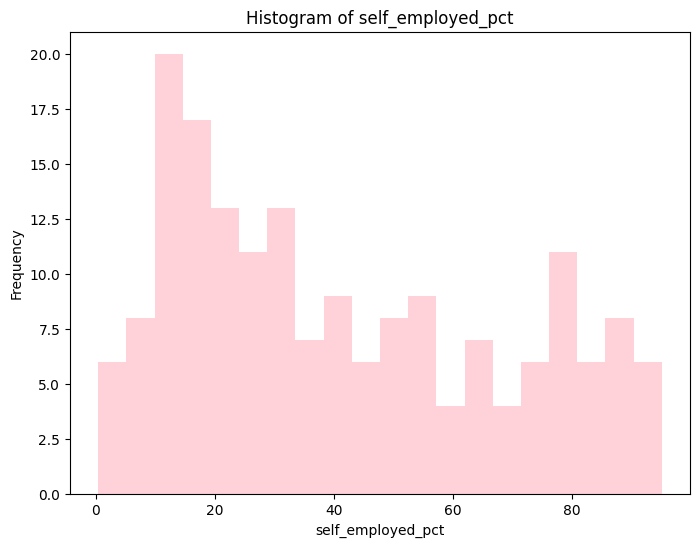

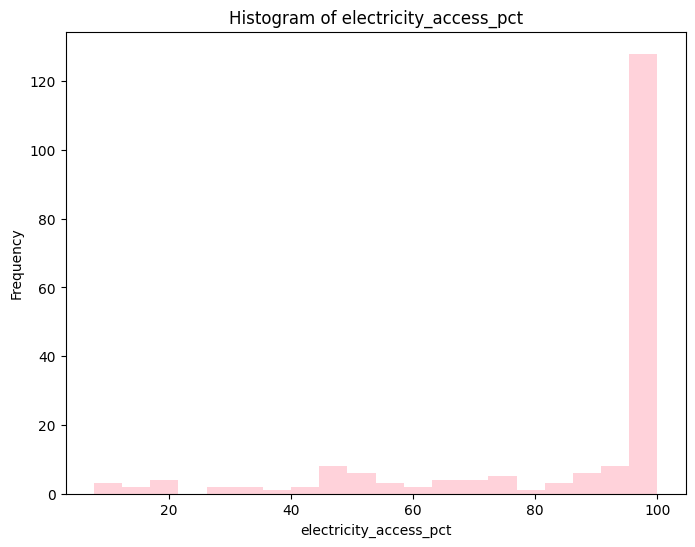

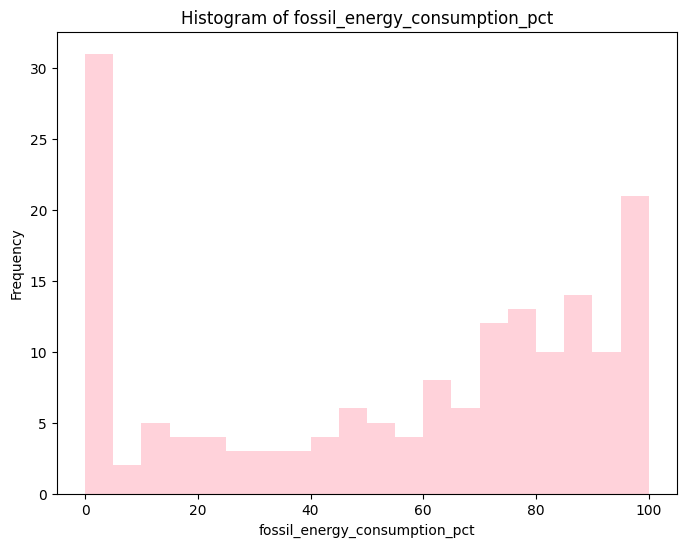

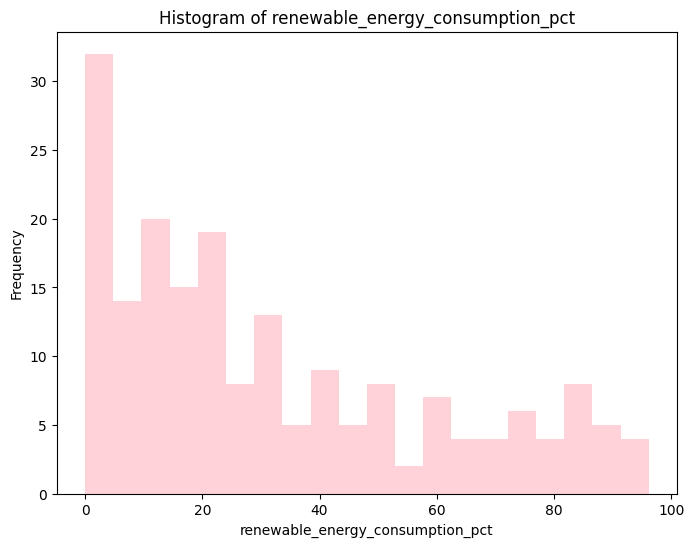

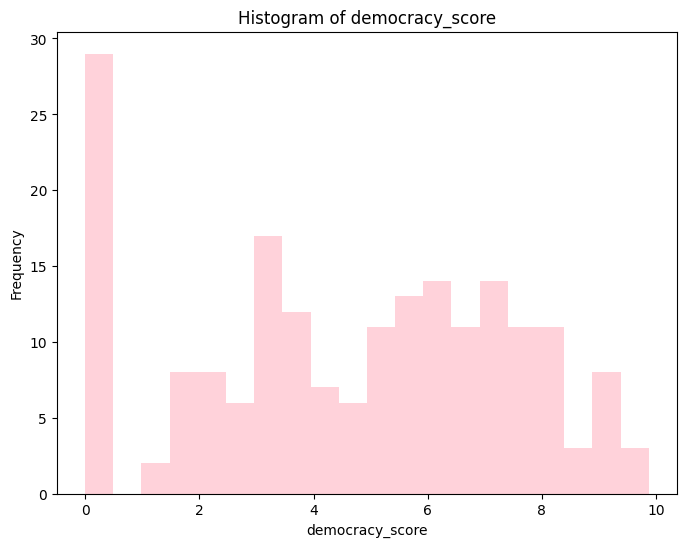

In [ ]:
import matplotlib.pyplot as plt
# Columns to create histograms for
histogram_columns = [
    "self_employed_pct",
    "electricity_access_pct",
    "fossil_energy_consumption_pct",
    "renewable_energy_consumption_pct",
    "democracy_score"
]

# Create histograms using Matplotlib
for column in histogram_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data.select(column).dropna().rdd.flatMap(lambda x: x).collect(), bins=20, color='pink', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


***Main findings from histograms***


1, Most of the countries have electricity_access_pct over 80%

2, Most of the countries have renewable_energy_consumption_pct lower than 40%

3, Most of the countries have democracy_score between 3-8

4, Self employment rate is evently distributed. more contries have Self employment rate lower than 20%

5, Fossil energy compsumption vs Frequency graph is skewed to the right but with low outlier. That means, most countries have fossil_consumption_pct above 55.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType

# Define the schema for the dataset

df = data

# Show the schema of the DataFrame
df.printSchema()


root
 |-- country: string (nullable = true)
 |-- country_long: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- capital_city: string (nullable = true)
 |-- region: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- demonym: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- agricultural_land: double (nullable = true)
 |-- forest_area: double (nullable = true)
 |-- land_area: double (nullable = true)
 |-- rural_land: double (nullable = true)
 |-- urban_land: double (nullable = true)
 |-- central_government_debt_pct_gdp: double (nullable = true)
 |-- expense_pct_gdp: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- inflation: double (nullable = true)
 |-- self_employed_pct: double (nullable = true)
 |-- tax_revenue_pct_gdp: double (nullable = true)
 |-- unemployment_pct: double (nullable = true)
 |-- vulnerable_employment_pct: double (nullable = true)
 |-- electricity_acce

In [ ]:

from pyspark.sql.functions import expr

# Read the data from a CSV file
df = data

# Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("countries")

# Define the columns for which you want to calculate statistics
columns_to_analyze = [
    "self_employed_pct",
    "electricity_access_pct",
    "fossil_energy_consumption_pct",
    "renewable_energy_consumption_pct",
    "democracy_score"
]

# Calculate and show statistics for each column
for column in columns_to_analyze:
    print(f"Statistics for {column}:")
    result = spark.sql(f"""
        SELECT
            MIN({column}) AS min,
            MAX({column}) AS max,
            AVG({column}) AS mean,
            percentile({column}, 0.25) AS percentile_25,
            percentile({column}, 0.75) AS percentile_75,
            percentile({column}, 0.5) AS median
        FROM countries
    """)
    result.show()


Statistics for self_employed_pct:
+------+-------+-----------------+-------------+-------------+-------+
|   min|    max|             mean|percentile_25|percentile_75| median|
+------+-------+-----------------+-------------+-------------+-------+
|0.3774|95.1024|41.38118268156425|      16.2085|     66.06825|34.0519|
+------+-------+-----------------+-------------+-------------+-------+

Statistics for electricity_access_pct:
+-------+-----+-----------------+-------------+-------------+------+
|    min|  max|             mean|percentile_25|percentile_75|median|
+-------+-----+-----------------+-------------+-------------+------+
|7.74776|100.0|85.78938484536081|     79.46375|        100.0| 100.0|
+-------+-----+-----------------+-------------+-------------+------+

Statistics for fossil_energy_consumption_pct:
+---+-------+----------------+-------------+-------------+-------+
|min|    max|            mean|percentile_25|percentile_75| median|
+---+-------+----------------+-------------+-

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import col, split

df = data

# Convert the string to lowercase and split into words
df = df.withColumn("region_words", split(col("region"), " "))

# Use CountVectorizer to get word frequencies
vectorizer = CountVectorizer(inputCol="region_words", outputCol="features", vocabSize=100, minDF=2)
vectorizer_model = vectorizer.fit(df)
df = vectorizer_model.transform(df)

# Calculate the most common words
vocab = vectorizer_model.vocabulary
total_words = df.select("features").rdd.map(lambda x: x[0].toArray()).sum()
word_count = list(zip(vocab, total_words))

# Sort the words by count in descending order
sorted_word_count = sorted(word_count, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
top_n = 20
for i, (word, count) in enumerate(sorted_word_count[:top_n], start=1):
    print(f"{i}. Word: {word}, Count: {count}")


1. Word: Africa, Count: 54.0
2. Word: Asia, Count: 47.0
3. Word: Europe, Count: 44.0
4. Word: Western, Count: 42.0
5. Word: Eastern, Count: 32.0
6. Word: Southern, Count: 29.0
7. Word: America, Count: 22.0
8. Word: Northern, Count: 18.0
9. Word: Caribbean, Count: 13.0
10. Word: Central, Count: 13.0
11. Word: South, Count: 12.0
12. Word: South-Eastern, Count: 11.0
13. Word: Middle, Count: 10.0
14. Word: Micronesia, Count: 5.0
15. Word: Melanesia, Count: 4.0
16. Word: Polynesia, Count: 3.0
17. Word: Australia, Count: 2.0
18. Word: New, Count: 2.0
19. Word: Zealand, Count: 2.0
20. Word: and, Count: 2.0


From this table we can see that most of the coutries in the dataset are from Aferica.

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

Firs, I would reduce the number of colums of the dataset. Having more data might increase the accuracy of the model I am going to build later in section 4 but I think adding too many or including all the features/colums can cause the model to predict with high variance which can lead to less accurate resultes. Thus i am selecting only some of the colums.

In [ ]:

# Display selected columns
selected_columns = [
   "country","region", "gdp","land_area", "self_employed_pct", "electricity_access_pct", "fossil_energy_consumption_pct",
   "renewable_energy_consumption_pct", "population_female", "population_male", "population", "democracy_score"
]

data = data[selected_columns]

data.show()


+-------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|            country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|population|democracy_score|
+-------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|        Afghanistan|       Southern Asia|1.45831E10| 652230.0|          84.3339|                  97.7|                         null|                           17.86|         20362329|       20766442|  41128771|           2.97|
|            Albania|     Southern Europe|1.88821E10|  27400.0|          53.0455|   

Remove null values and 0s.

In [ ]:
# Remove rows with null values and zeroes
data = data.dropna()
data_cleaned = data[(data['land_area'] != 0) &
        (data['self_employed_pct'] != 0) &
        (data['electricity_access_pct'] != 0) &
        (data['fossil_energy_consumption_pct'] != 0) &
        (data['renewable_energy_consumption_pct'] != 0)&
        (data['population_female'] != 0) &
        (data['population_male'] != 0) &
        (data['population'] != 0) &
        (data['democracy_score'] != 0)]

# Display selected columns
data_cleaned.show()


+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|population|democracy_score|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             Albania|     Southern Europe|1.88821E10|  27400.0|          53.0455|                 100.0|                      61.4218|                           44.58|          1391085|        1384548|   2775634|           5.98|
|             Algeria|     Northern Africa|1.91913E11|2381740.0|          30.525

In [ ]:

from pyspark.sql.functions import col

# Count rows before dropping data
count_before = data.count()

# Count rows after dropping data
count_after = data_cleaned.count()

# Display counts
print("Count of rows before cleaning:", count_before)
print("Count of rows after cleaning:", count_after)

# Display selected columns
data_cleaned.show()


Count of rows before cleaning: 159
Count of rows after cleaning: 133
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|population|democracy_score|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             Albania|     Southern Europe|1.88821E10|  27400.0|          53.0455|                 100.0|                      61.4218|                           44.58|          1391085|        1384548|   2775634|           5.98|
|          

In [ ]:

from pyspark.sql.functions import col, lower, regexp_replace

# Columns to clean
columns_to_clean = ['country', 'region']

# Clean and preprocess text columns
for column in columns_to_clean:
    # Remove punctuation and symbols
    data = data_cleaned.withColumn(column, regexp_replace(col(column), '[^\sa-zA-Z0-9]', ''))
    # Convert text to lowercase
    data = data_cleaned.withColumn(column, lower(col(column)))

# Display cleaned data
data.show()

+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|population|democracy_score|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+
|             Albania|     southern europe|1.88821E10|  27400.0|          53.0455|                 100.0|                      61.4218|                           44.58|          1391085|        1384548|   2775634|           5.98|
|             Algeria|     northern africa|1.91913E11|2381740.0|          30.525

In [ ]:
from pyspark.sql.functions import col

# Add new columns
data = data.withColumn("gdp_per_capita", col("gdp") / col("population"))
data = data.withColumn("male_female_rat", col("population_male") / col("population_female"))

# Show the updated DataFrame
data.show()

+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+------------------+------------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|population|democracy_score|    gdp_per_capita|   male_female_rat|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+----------+---------------+------------------+------------------+
|             Albania|     southern europe|1.88821E10|  27400.0|          53.0455|                 100.0|                      61.4218|                           44.58|          1391085|        13

Here I added gdp_per_capita and male_female_ratio since those can also have an affect on a country's GDP.

In [ ]:
from pyspark.sql.functions import col
# Convert specific columns to numeric types
numeric_columns = ["gdp","land_area","self_employed_pct", "electricity_access_pct", "fossil_energy_consumption_pct",
   "renewable_energy_consumption_pct", "population_female", "population_male", "population", "democracy_score","gdp_per_capita","male_female_rat"]
for col_name in numeric_columns:
    data = data.withColumn(col_name, col(col_name).cast("double"))

# See the updated data types
data.printSchema()

# Get the data types of each column
column_data_types = data.dtypes
for col_name, col_type in column_data_types:
    print(f"Column: {col_name}, Data Type: {col_type}")
data.show()

root
 |-- country: string (nullable = true)
 |-- region: string (nullable = true)
 |-- gdp: double (nullable = true)
 |-- land_area: double (nullable = true)
 |-- self_employed_pct: double (nullable = true)
 |-- electricity_access_pct: double (nullable = true)
 |-- fossil_energy_consumption_pct: double (nullable = true)
 |-- renewable_energy_consumption_pct: double (nullable = true)
 |-- population_female: double (nullable = true)
 |-- population_male: double (nullable = true)
 |-- population: double (nullable = true)
 |-- democracy_score: double (nullable = true)
 |-- gdp_per_capita: double (nullable = true)
 |-- male_female_rat: double (nullable = true)

Column: country, Data Type: string
Column: region, Data Type: string
Column: gdp, Data Type: double
Column: land_area, Data Type: double
Column: self_employed_pct, Data Type: double
Column: electricity_access_pct, Data Type: double
Column: fossil_energy_consumption_pct, Data Type: double
Column: renewable_energy_consumption_pct, Data

Converted most of the colums to "double" to do calculations late.

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

In [ ]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

# Split data into train and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Display the count of train and test data
print("Train data count:", train_data.count())
print("Test data count:", test_data.count())


Train data count: 109
Test data count: 24


In [ ]:
data.show()

+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|  population|democracy_score|    gdp_per_capita|   male_female_rat|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+
|             Albania|     southern europe|1.88821E10|  27400.0|          53.0455|                 100.0|                      61.4218|                           44.58|        1391085.0|    

In [ ]:

from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Index and encode the "region" column
indexer = StringIndexer(inputCol="region", outputCol="region_index")
encoder = OneHotEncoder(inputCol="region_index", outputCol="region_encoded")

# Select relevant features
selected_features = [
    "land_area",
    "self_employed_pct",
    "electricity_access_pct",
    "fossil_energy_consumption_pct",
    "renewable_energy_consumption_pct",
    "population_female",
    "population_male",
    "population",
    "democracy_score",
    "gdp_per_capita",
    "male_female_rat"
]

# Create a vector assembler for relevant features
feature_assembler = VectorAssembler(inputCols=selected_features, outputCol="features")

# Create a pipeline with indexing, encoding, feature assembler, and encoders
pipeline = Pipeline(stages=[indexer, encoder, feature_assembler])

# Fit and transform the data using the pipeline
processed_data = pipeline.fit(data).transform(data)

# Show the processed data
processed_data.show()


+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+------------+---------------+--------------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|  population|democracy_score|    gdp_per_capita|   male_female_rat|region_index| region_encoded|            features|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+------------+---------------+--------------------+
|             Albania|     southern euro

# Section 4: Show analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results



In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

features = [
    "land_area",
    "self_employed_pct",
    "electricity_access_pct",
    "fossil_energy_consumption_pct",
    "renewable_energy_consumption_pct",
    "population_female",
    "population_male",
    "population",
    "democracy_score",
    "gdp_per_capita",
    "male_female_rat"
]

# Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="gdp", predictionCol="predicted_gdp")
lr_model = lr.fit(processed_data)
regression_results = lr_model.transform(processed_data)

# Evaluation for the model
regression_evaluator = RegressionEvaluator(labelCol="gdp", predictionCol="predicted_gdp", metricName="rmse")
rmse = regression_evaluator.evaluate(regression_results)
print("Root Mean Squared Error (RMSE) for Regression:", rmse)

# Show results
regression_results.select("country", "gdp", "predicted_gdp").show()



Root Mean Squared Error (RMSE) for Regression: 422172233215.33673
+--------------------+----------+--------------------+
|             country|       gdp|       predicted_gdp|
+--------------------+----------+--------------------+
|             Albania|1.88821E10|-3.78587246707368...|
|             Algeria|1.91913E11|2.914976254586285...|
|              Angola|1.06714E11|9.184895681949756E10|
|           Argentina| 6.3277E11|6.833467907683484E11|
|             Armenia|1.95028E10|1.830166067654416...|
|           Australia|1.67542E12|1.240813000542492...|
|             Austria|  4.714E11|  5.4459419626303E11|
|          Azerbaijan|7.87211E10|-1.10769259917464...|
|          Bangladesh|4.60201E11|8.866494977505936E11|
|             Belarus|7.27935E10|1.589652832554449E11|
|             Belgium|5.78604E11|6.573685499538724E11|
|               Benin|1.74017E10|1.595943238629503...|
|             Bolivia|4.30689E10|1.377738602227379E11|
|Bosnia and Herzeg...|2.45275E10|-2.09412700369536...|

In [ ]:
from pyspark.sql.functions import expr

# Define the lower and upper bounds for winsorization
lower_bound = 0.05
upper_bound = 0.95

# Calculate the winsorization bounds for "gdp"
quantiles = processed_data.approxQuantile("gdp", [lower_bound, upper_bound], relativeError=0.0)
lower_winsor_bound = quantiles[0]
upper_winsor_bound = quantiles[1]

# Apply winsorization to "gdp"
processed_data = processed_data.withColumn(
    "gdp",
    expr(
        f"CASE WHEN gdp < {lower_winsor_bound} THEN {lower_winsor_bound} " +
        f"WHEN gdp > {upper_winsor_bound} THEN {upper_winsor_bound} ELSE gdp END"
    )
)

# Linear Regression with Winsorized "gdp"
lr = LinearRegression(featuresCol="features", labelCol="gdp", predictionCol="predicted_gdp")
lr_model = lr.fit(processed_data)
regression_results = lr_model.transform(processed_data)

# Evaluation for the model
regression_evaluator = RegressionEvaluator(labelCol="gdp", predictionCol="predicted_gdp", metricName="rmse")
rmse = regression_evaluator.evaluate(regression_results)
print("Root Mean Squared Error (RMSE) for Regression with Winsorization:", rmse)

# Show results
regression_results.select("country", "gdp", "predicted_gdp").show()


Root Mean Squared Error (RMSE) for Regression with Winsorization: 422172233215.33673
+--------------------+----------+--------------------+
|             country|       gdp|       predicted_gdp|
+--------------------+----------+--------------------+
|             Albania|1.88821E10|-3.78587246707368...|
|             Algeria|1.91913E11|2.914976254586285...|
|              Angola|1.06714E11|9.184895681949756E10|
|           Argentina| 6.3277E11|6.833467907683484E11|
|             Armenia|1.95028E10|1.830166067654416...|
|           Australia|1.67542E12|1.240813000542492...|
|             Austria|  4.714E11|  5.4459419626303E11|
|          Azerbaijan|7.87211E10|-1.10769259917464...|
|          Bangladesh|4.60201E11|8.866494977505936E11|
|             Belarus|7.27935E10|1.589652832554449E11|
|             Belgium|5.78604E11|6.573685499538724E11|
|               Benin|1.74017E10|1.595943238629503...|
|             Bolivia|4.30689E10|1.377738602227379E11|
|Bosnia and Herzeg...|2.45275E10|-2

In [ ]:
# Register the DataFrame as a temporary SQL table
processed_data.createOrReplaceTempView("processed_data_table")

# Perform SQL queries
positive_gdp_countries = spark.sql("SELECT * FROM processed_data_table WHERE gdp > 0")

# Show filtered results
positive_gdp_countries.show()

+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+------------+---------------+--------------------+
|             country|              region|       gdp|land_area|self_employed_pct|electricity_access_pct|fossil_energy_consumption_pct|renewable_energy_consumption_pct|population_female|population_male|  population|democracy_score|    gdp_per_capita|   male_female_rat|region_index| region_encoded|            features|
+--------------------+--------------------+----------+---------+-----------------+----------------------+-----------------------------+--------------------------------+-----------------+---------------+------------+---------------+------------------+------------------+------------+---------------+--------------------+
|             Albania|     southern euro

# Additional Analysis
------
-----
---


1, Which countries has the highest GDP;

2, Which countries has the highest GDP per capta;

3, Which countries has the lowest GDP;

In [ ]:
from pyspark.sql.functions import col
top_gdp_countries = data.orderBy(col("gdp").desc()).limit(10)

# Display the top 10 countries with the highest GDP
top_gdp_countries.select("country", "gdp").show()

+--------------+----------+
|       country|       gdp|
+--------------+----------+
| United States|2.54627E13|
|         China|1.79632E13|
|         Japan|4.23114E12|
|       Germany|4.07219E12|
|         India|3.38509E12|
|United Kingdom|3.07067E12|
|        France|2.78291E12|
|        Russia|2.24042E12|
|        Canada|2.13984E12|
|         Italy|2.01043E12|
+--------------+----------+



In [ ]:
top_gdp_countries = data.orderBy(col("gdp")).limit(10)

# Display the top 10 countries with the highest GDP
top_gdp_countries.select("country", "gdp").show()

+--------------------+----------+
|             country|       gdp|
+--------------------+----------+
|             Eritrea|   2.065E9|
|            Suriname| 3.62066E9|
|          Montenegro| 6.09598E9|
|                Togo| 8.12644E9|
|          Tajikistan|1.04921E10|
|     Kyrgyz Republic|1.09306E10|
|Syrian Arab Republic|1.11593E10|
|             Namibia|1.26074E10|
|           Mauritius|1.28983E10|
|     North Macedonia|1.35631E10|
+--------------------+----------+



In [ ]:
top_gdp_countries = data.orderBy(col("gdp_per_capita").desc()).limit(10)

# Display the top 10 countries with the highest GDP
top_gdp_countries.select("country", "gdp_per_capita").show()

+-------------+------------------+
|      country|    gdp_per_capita|
+-------------+------------------+
|   Luxembourg|126426.07110917153|
|       Norway| 106148.7115839525|
|      Ireland|104038.97158790231|
|  Switzerland| 92101.46571033284|
|        Qatar| 88046.47804440763|
|    Singapore| 82807.73074861159|
|United States| 76398.59174220536|
|      Iceland| 72902.85415030112|
|      Denmark| 66983.14782712696|
|    Australia|64491.481271268436|
+-------------+------------------+



In [ ]:
df = data

# 1: Region with the highest GDP
highest_gdp_region = df.orderBy(col("gdp").desc()).select("region").first()[0]
print("Region with the highest GDP:", highest_gdp_region)

# 2: Region with the highest GDP per capita
highest_gdp_per_capita_region = df.orderBy(col("gdp_per_capita").desc()).select("region").first()[0]
print("Region with the highest GDP per capita:", highest_gdp_per_capita_region)

# 3: Region with the lowest GDP
lowest_gdp_region = df.orderBy(col("gdp")).select("region").first()[0]
print("Region with the lowest GDP:", lowest_gdp_region)

Region with the highest GDP: northern america
Region with the highest GDP per capita: western europe
Region with the lowest GDP: eastern africa


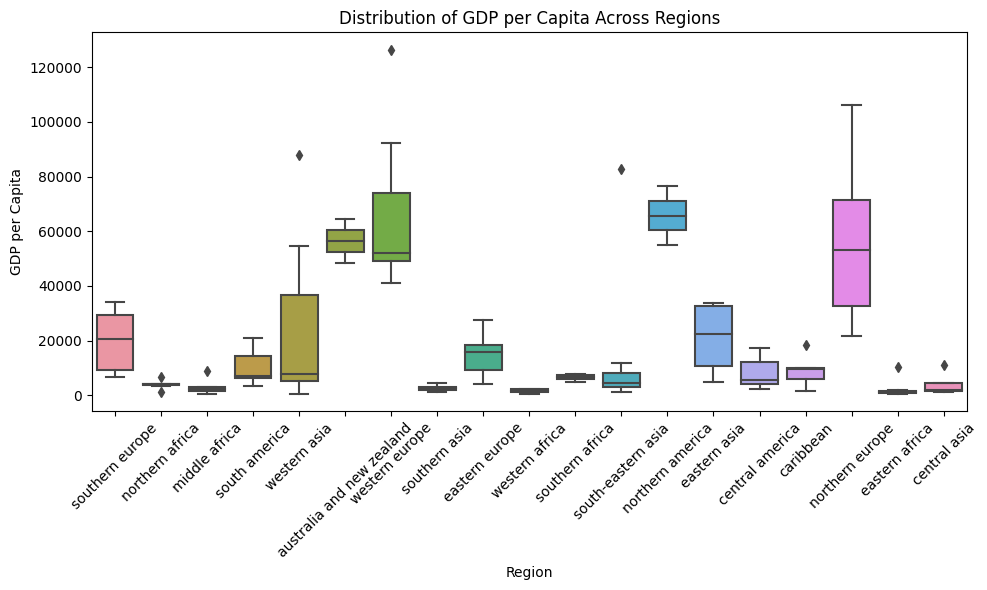

+--------------------+---------------------+------------------+------------------+
|              region|median_gdp_per_capita|max_gdp_per_capita|min_gdp_per_capita|
+--------------------+---------------------+------------------+------------------+
|    northern america|   54966.488227995025| 76398.59174220536|54966.488227995025|
|      western europe|    52131.43934970398|126426.07110917153|40963.906142959386|
|     northern europe|    50536.63206691525| 106148.7115839525|21851.098477789124|
|australia and new...|    48249.25352744872|64491.481271268436| 48249.25352744872|
|     southern europe|   20732.064288648755| 34157.96296393519|  6591.45571296592|
|      eastern europe|    15606.62124988165| 27638.41748009918| 4223.763157894737|
|        eastern asia|    12720.23651459628|33815.307668078996| 4946.759707459409|
|           caribbean|    9574.578242557587|18222.271861553294|1748.2612855455452|
|        western asia|    7736.705278890962| 88046.47804440763|504.36946494929845|
|   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pyspark.sql.functions import expr

df = data

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="gdp_per_capita", data=pandas_df)
plt.xticks(rotation=45)
plt.title("Distribution of GDP per Capita Across Regions")
plt.xlabel("Region")
plt.ylabel("GDP per Capita")
plt.tight_layout()

# Show the box plot
plt.show()

# Calculate median, max, and min GDP per capita for each region
stats_df = df.groupBy("region").agg(
    expr("percentile_approx(gdp_per_capita, 0.5)").alias("median_gdp_per_capita"),
    expr("max(gdp_per_capita)").alias("max_gdp_per_capita"),
    expr("min(gdp_per_capita)").alias("min_gdp_per_capita")
).orderBy("median_gdp_per_capita", ascending=False)

# Show the results
stats_df.show()


In [ ]:
# Stop the Spark session
spark.stop()